In [1]:
from matplotlib import pyplot as plt
import numpy as np
from cpymad.madx import Madx
import pandas as pd

# Tutorial 6


## First part
Retrieve the http://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/

In [2]:
# A simple way to download it
!wget http://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/pprun1/inj/lhc_pprun1_inj.seq 

--2021-01-21 21:40:49--  http://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/pprun1/inj/lhc_pprun1_inj.seq
Resolving abpdata.web.cern.ch (abpdata.web.cern.ch)... 188.185.90.87, 188.185.87.216, 137.138.31.235, ...
Connecting to abpdata.web.cern.ch (abpdata.web.cern.ch)|188.185.90.87|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/pprun1/inj/lhc_pprun1_inj.seq [following]
--2021-01-21 21:40:49--  https://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/pprun1/inj/lhc_pprun1_inj.seq
Connecting to abpdata.web.cern.ch (abpdata.web.cern.ch)|188.185.90.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9328683 (8.9M)
Saving to: ‘lhc_pprun1_inj.seq.1’

lhc_pprun1_inj.seq. 100%[===================>]   8.90M  7.90MB/s    in 1.1s    

2021-01-21 21:40:51 (7.90 MB/s) - ‘lhc_pprun1_inj.seq.1’ saved [9328683/9328683]



In [3]:
myMad = Madx()
myString='''
! very important to swicht OFF the echo
option, echo=false, warn=false;
call, file=lhc_pprun1_inj.seq;
! very important to switch ON the echo
option, echo=true, warn=true;

select, flag=twiss, column=S, NAME, PARENT, L, BETX, ALFX, MUX, BETY, ALFY, MUY, X, PX, Y, PY, DX, DPX, DY, DPY;

'''
myMad.input(myString);

myMad.input('''
use, sequence=lhcb1;
twiss, sequence=lhcb1, table=b1_twiss;
''')
B1InjDFTable=myMad.table['b1_twiss'].dframe()
B1InjSumm=myMad.table['summ'].dframe()

myMad.input('''
use, sequence=lhcb2;
twiss, sequence=lhcb2, table=b2_twiss;
''')
B2InjDFTable=myMad.table['b2_twiss'].dframe()
B2InjSumm=myMad.table['summ'].dframe()



  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.01.21 21:40:51      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
        26658.8832                 -0    0.0003216320931        55.75968498 

                q1                dq1            betxmax              dxmax 
       64.28000059      0.01206195746        595.1195205        2.813786992 

             dxrms             xcomax             xcorms                 q2 
       1.397291612      0.01099761666    0.0007349886391        59.31000015 

               dq2            betymax              dymax              dyrms 
     0.01223947643        609.5259604       0.1856195725      0.05612134582 

            ycomax             ycorms             deltap 

### Analysis

Lenght of the machine. One can see it from the summary table, it is the same for the two beams.

In [4]:
display(B1InjDFTable['s'].values[-1])
B2InjDFTable['s'].values[-1]

26658.88319999885

26658.88319999884

In [5]:
print('-------------------------')
print('******* B1 in IP1 *******')
print('-------------------------')
display(B1InjDFTable[B1InjDFTable['name']=='ip1:1'][['s','name','betx','bety']])
print('-------------------------')
print('******* B2 in IP1 *******')
print('-------------------------')
display(B2InjDFTable[B2InjDFTable['name']=='ip1:1'][['s','name','betx','bety']])

-------------------------
******* B1 in IP1 *******
-------------------------


s   name       betx       bety
ip1  2785.541442  ip1:1  11.000005  11.000005

-------------------------
******* B2 in IP1 *******
-------------------------


s   name       betx  bety
ip1  2785.679958  ip1:1  11.000004  11.0

In [6]:
print('-------------------------')
print('******* B1 in IP5 *******')
print('-------------------------')
display(B1InjDFTable[B1InjDFTable['name']=='ip1:1'][['s','name','betx','bety']])
print('-------------------------')
print('******* B2 in IP5 *******')
print('-------------------------')
display(B2InjDFTable[B2InjDFTable['name']=='ip1:1'][['s','name','betx','bety']])

-------------------------
******* B1 in IP5 *******
-------------------------


s   name       betx       bety
ip1  2785.541442  ip1:1  11.000005  11.000005

-------------------------
******* B2 in IP5 *******
-------------------------


s   name       betx  bety
ip1  2785.679958  ip1:1  11.000004  11.0

### About the tunes

In [7]:
display(B2InjSumm['q1'].values[0])
B2InjSumm['q2'].values[0]

64.27999987817644

59.31000003421767

In [8]:
display(B2InjSumm['q1'].values[0])
B2InjSumm['q2'].values[0]

64.27999987817644

59.31000003421767

### About collisions at injection

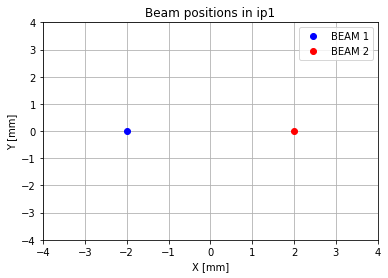

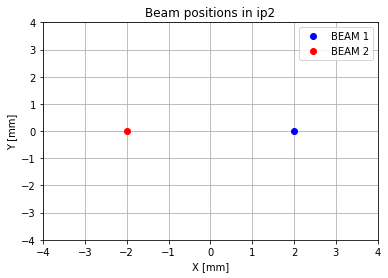

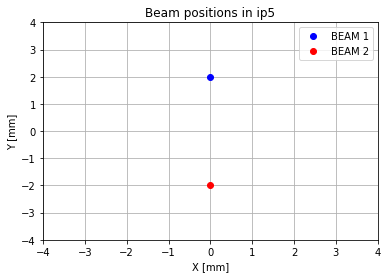

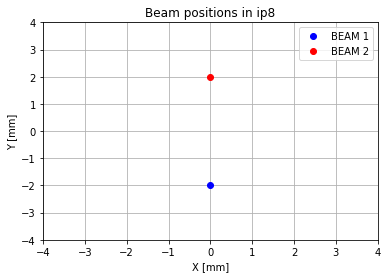

In [9]:
for myIP in ['ip1', 'ip2', 'ip5', 'ip8']:
    plt.figure()
    aux=B1InjDFTable[B1InjDFTable['name']==myIP+':1']
    plt.plot(aux['x']*1000,aux['y']*1000,'ob', label='BEAM 1')
    aux=B2InjDFTable[B2InjDFTable['name']==myIP+':1']
    plt.plot(aux['x']*1000,aux['y']*1000,'or', label='BEAM 2')
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.title('Beam positions in ' + myIP)
    plt.legend(loc='best')
    plt.xlabel('X [mm]')
    plt.ylabel('Y [mm]')
    plt.grid()

**Conclusion**: the two beams are not colliding at injection in the IPs.

## Second part


In [10]:
# A simple way to download it
!wget http://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/pprun1/coll_4tev/lhc_pprun1_coll_4tev.seq

--2021-01-21 21:40:56--  http://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/pprun1/coll_4tev/lhc_pprun1_coll_4tev.seq
Resolving abpdata.web.cern.ch (abpdata.web.cern.ch)... 188.185.90.87, 188.185.87.216, 137.138.31.235, ...
Connecting to abpdata.web.cern.ch (abpdata.web.cern.ch)|188.185.90.87|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/pprun1/coll_4tev/lhc_pprun1_coll_4tev.seq [following]
--2021-01-21 21:40:56--  https://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/pprun1/coll_4tev/lhc_pprun1_coll_4tev.seq
Connecting to abpdata.web.cern.ch (abpdata.web.cern.ch)|188.185.90.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9329232 (8.9M)
Saving to: ‘lhc_pprun1_coll_4tev.seq.2’

lhc_pprun1_coll_4te 100%[===================>]   8.90M  6.36MB/s    in 1.4s    

2021-01-21 21:40:57 (6.36 MB/s) - ‘lhc_pprun1_coll_4tev.seq.2’ saved [9329232/9329232]



In [11]:
myMad = Madx()
myString='''
! very important to swicht OFF the echo
option, echo=false, warn=false;
call, file=lhc_pprun1_coll_4tev.seq;
! very important to switch ON the echo
option, echo=true, warn=true;

select, flag=twiss, column=S, NAME, PARENT, L, BETX, ALFX, MUX, BETY, ALFY, MUY, X, PX, Y, PY, DX, DPX, DY, DPY;
use, sequence=lhcb1;
twiss, sequence=lhcb1;

'''
myMad.input(myString);
B1FTDFTable=myMad.table['twiss'].dframe()
B1FTSumm=myMad.table['summ'].dframe()

myMad.input('''use, sequence=lhcb2;
twiss, sequence=lhcb2;''')
B2FTDFTable=myMad.table['twiss'].dframe()
B2FTSumm=myMad.table['summ'].dframe()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.01.21 21:40:58      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
        26658.8832                 -0    0.0003212341475         55.7942119 

                q1                dq1            betxmax              dxmax 
       64.31000038      -0.1001140257        4036.119845        2.797679064 

             dxrms             xcomax             xcorms                 q2 
       1.397703816       0.0108023758    0.0008315832488        59.31999993 

               dq2            betymax              dymax              dyrms 
      0.1461801336        4036.122052        1.513092068        0.223761242 

            ycomax             ycorms             deltap 

In [12]:
print('-------------------------')
print('******* B1 in IP1 *******')
print('-------------------------')
display(B1FTDFTable[B1FTDFTable['name']=='ip1:1'][['s','name','betx','bety','x','y','px','py']])
print('-------------------------')
print('******* B2 in IP1 *******')
print('-------------------------')
display(B2FTDFTable[B2FTDFTable['name']=='ip1:1'][['s','name','betx','bety','x','y','px','py']])


-------------------------
******* B1 in IP1 *******
-------------------------


s   name  betx  bety             x             y            px  \
ip1  2785.541442  ip1:1   0.6   0.6 -1.420441e-10  3.587989e-12 -3.158172e-09   

           py  
ip1 -0.000145

-------------------------
******* B2 in IP1 *******
-------------------------


s   name      betx  bety             x             y  \
ip1  2785.679958  ip1:1  0.599999   0.6  1.902437e-09 -3.565505e-12   

               px        py  
ip1  4.278417e-09  0.000145

In [13]:
print('-------------------------')
print('******* B1 in IP5 *******')
print('-------------------------')
display(B1FTDFTable[B1FTDFTable['name']=='ip5:1'][['s','name','betx','bety','x','y','px','py']])
print('-------------------------')
print('******* B2 in IP5 *******')
print('-------------------------')
display(B2FTDFTable[B2FTDFTable['name']=='ip5:1'][['s','name','betx','bety','x','y','px','py']])


-------------------------
******* B1 in IP5 *******
-------------------------


s   name  betx  bety             x             y        px  \
ip5  16114.830675  ip5:1   0.6   0.6  8.733779e-10 -8.607390e-13  0.000145   

               py  
ip5  7.031882e-12

-------------------------
******* B2 in IP5 *******
-------------------------


s   name  betx  bety             x             y        px  \
ip5  16115.273925  ip5:1   0.6   0.6 -1.188192e-09  2.225583e-12 -0.000145   

               py  
ip5  4.846276e-12

Therefore we have a vertical crossing angle in IP1 and horizontal crossing angle in IP5. We reduce the $\beta^*$ only at FlatTop (FT) since, due to the adiabatic damping, we can increase beam envelope in the final focusing system (by reducing the $\beta^*$ at the IP the beta in the final focusing system increases).

In [14]:
auxFT=B1FTDFTable[(B1FTDFTable['s']>2785.541442-250) & (B1FTDFTable['s']<2785.541442+250)]
auxInj=B1InjDFTable[(B1InjDFTable['s']>2785.541442-250) & (B1InjDFTable['s']<2785.541442+250)]

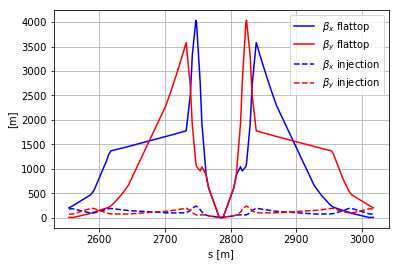

In [15]:
plt.plot(auxFT['s'],auxFT['betx'],'b',label='$\\beta_x$ flattop')
plt.plot(auxFT['s'],auxFT['bety'],'r',label='$\\beta_y$ flattop')
plt.plot(auxInj['s'],auxInj['betx'],'--b',label='$\\beta_x$ injection')
plt.plot(auxInj['s'],auxInj['bety'],'--r',label='$\\beta_y$ injection')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')